# Cake eating - cake size constraint

In [24]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm         # tqdm is a nice library to visualize ongoing loops
import datetime
# followint lines are used for indicative typing
from typing import Tuple
class Vector: pass

(200, 1) (200, 1)


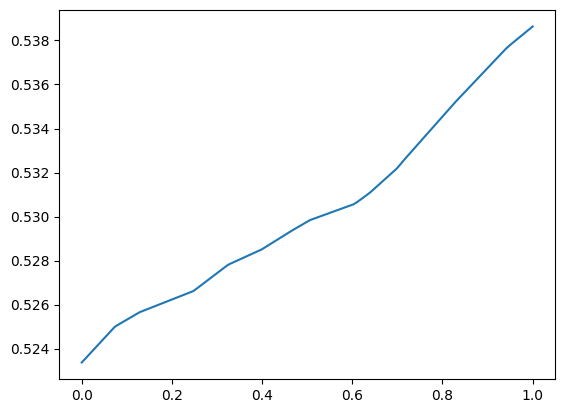

In [25]:
# Model parameters
β = 0.95
xmin=0.0001
xmax=1.0
min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)
layers = [
    tf.keras.layers.Normalization(axis=-1, input_dim=1, mean=0, variance=1, invert=False),
    tf.keras.layers.Dense(32, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(32, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
]
perceptron = tf.keras.Sequential(layers)

def model(x:Vector)->Tuple[Vector]:
    sh = perceptron(x)
    return sh

λ=2
xvec = np.power(np.linspace(xmin**(1/λ),xmax**(1/λ),200,dtype='float32'),λ).reshape(-1,1)
print(xvec.shape, model(xvec).shape)
plt.plot(xvec, model(xvec), label = 'c(x)')

In [26]:
def residuals(x:Vector):
    sh=model(x)
    c=sh*x
    xp=x-c
    shp=model(xp)
    cp=shp*xp
    R = min_FB(1-sh,c**(-1)-β*cp**(-1))
    return R

residuals(xvec);

def J(n):
    x = tf.random.uniform(shape=(n,1),minval=xmin,maxval=xmax)
    R = residuals(x)
    R_squared = R*R
    return tf.reduce_mean(R_squared)

n = 5000
v = J(n)
v.numpy()

111786.05

In [27]:
θ = perceptron.trainable_variables
print(str(θ)[:1000])

[<tf.Variable 'dense_6/kernel:0' shape=(1, 32) dtype=float32, numpy=
array([[-0.1270327 , -0.01536378, -0.09570271,  0.33278406,  0.22528446,
         0.41971612, -0.04562733,  0.09327215, -0.13126114,  0.2213822 ,
        -0.23853612,  0.13288337,  0.17005485, -0.03600758,  0.11359411,
         0.09191334,  0.16947263, -0.36619607,  0.09231776, -0.02047777,
        -0.11485064, -0.35577703,  0.35516727,  0.06464931,  0.41914856,
         0.36596376,  0.20482063,  0.07379919, -0.0328095 ,  0.36354053,
         0.3982517 , -0.2656151 ]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.12771904,  0.14361313, -0.07207829, -0.39207584,  0.25594875,
       -0.03097665, -0.41606417,  0.05686954, -0.04911995,  0.24224016,
       -0.28206897, -0.06728688, -0.21954507, -0.22576743, -0.2742945 ,
        0.3731219 , -0.12095201, -0.04838529,  0.05462575, -0.3579808 ,
       -0.3676384 ,  0.16473594,  0.2564982 , -0.24982175, -0.25364733,
       -0.090773

In [28]:
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = SGD()
#optimizer.lr.assign(0.00001)

In [29]:
@tf.function
def training_step():
    
    with tf.GradientTape() as tape:
        xx = J(n)
        
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

In [30]:
results = train_me(5000)

100%|████████████████████████████████████████████████████| 5000/5000 [00:29<00:00, 172.33it/s]


In [32]:
results

[49014.293,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

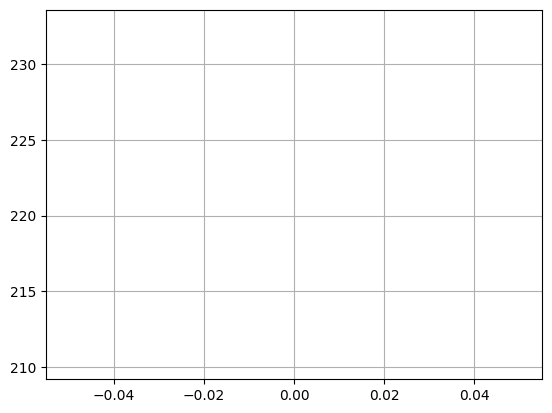

In [31]:
plt.plot(np.sqrt(results))
#plt.xscale('log')
#plt.yscale('log')
plt.grid()

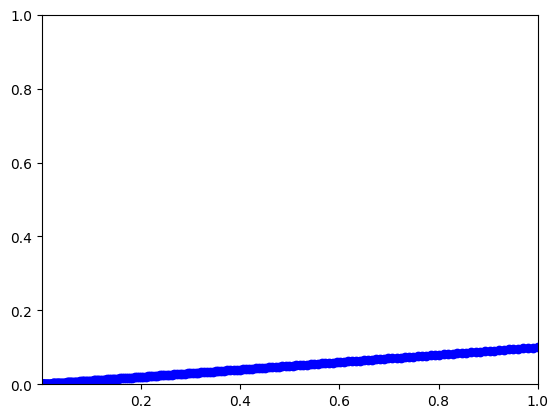

In [22]:
plt.plot(xvec,(1-β)*xvec, 'bo', label='True c(x)')
plt.xlim([xmin,xmax])
plt.ylim([0,1])
plt.show()

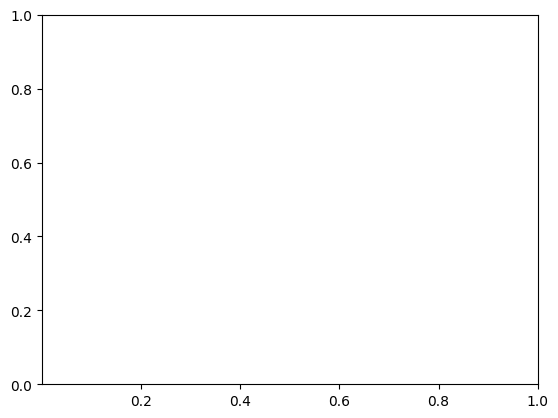

In [23]:
plt.plot(xvec,model(xvec)*xvec,label='Solved c(x)',c='b')
plt.xlim([xmin,xmax])
plt.ylim([0,1])
plt.show()